In [1]:
pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import unicodedata
import numpy as np
import unidecode
from scipy.stats import pearsonr
import statsmodels.api as sm
from IPython.display import display, HTML

# Criando arquivos com dados do IBGE

## Populção

In [3]:
# Criar os dados manualmente 
dados_censo = {
       "nome": [
        "BA", "PA", "MA", "AP", "PI", "TO", "AC", "SE",
        "AM", "CE", "AL", "RO", "MT", "PE", 
        "RR", "PB", "GO", "ES", "RN", 
        "DF", "MG", "RJ", "BR", 
        "MS", "SP", "PR", "SC", 
        "RS"
    ],
    "pop_total": [
        14141626, 8120131, 6776699, 733759, 3271199, 1511460, 830018, 2210004,
        3941613, 8794957, 3127683, 1581196, 3658649, 9058931, 636707, 3974687,
        7056495, 3833712, 3302729, 2817381, 20539989, 16055174, 203080756,
        2757013, 44411238, 11444380, 7610361, 10882965
    ],
    "pop_negra": [
        11268655, 6467067, 5353442, 565637, 2521542, 1138654, 620975, 1645464,
        2905285, 6286667, 2186574, 1073501, 2409480, 5916359, 413689, 2524452,
        4471424, 2338483, 1983709, 1672601, 12038028, 9276993, 112739744,
        1472898, 18183257, 3925818, 1772896, 2306194
    ],
    "perc_negra": [
        79.7, 79.6, 79.0, 77.1, 77.0, 75.3, 74.8, 74.4,
        73.7, 71.4, 69.9, 67.9, 65.9, 65.3, 65.0, 63.5,
        63.4, 61.0, 60.0, 59.3, 58.6, 57.8, 55.5,
        53.4, 41.0, 34.3, 23.3, 21.2
    ]
}

# Criar DataFrame
df_censo = pd.DataFrame(dados_censo)

# Salvar em CSV
df_censo.to_csv("censo_2022_pop_negra.csv", index=False, encoding="utf-8")

# Mostrar primeiras linhas
print(df_censo.head())

  nome  pop_total  pop_negra  perc_negra
0   BA   14141626   11268655        79.7
1   PA    8120131    6467067        79.6
2   MA    6776699    5353442        79.0
3   AP     733759     565637        77.1
4   PI    3271199    2521542        77.0


## PIB

In [4]:
# Criar os dados manualmente
dados_pib = {
    "posicao": list(range(1, 28)),
    "nome": [
        "SP", "RJ", "MG", "PR", "RS",
        "SC", "BA", "DF", "GO", "MT",
        "PE", "PA", "CE", "ES", "MS",
        "AM", "MA", "RN", "PB", "AL",
        "PI", "RO", "TO", "SE", "AC",
        "AP", "RR"
    ],
    "pib_mil_reais": [
        3130333000, 1153512000, 906731000, 614611000, 593634000,
        466274000, 402647000, 328790000, 318586000, 255527000,
        245828000, 236142000, 213601000, 182549000, 166407000,
        145140000, 139789000, 93819000, 86094000, 76066000,
        72835000, 66795000, 58209000, 57372000, 23676000,
        23614000, 21095000
    ],
    "variacao": [
        "Aumento", "Aumento", "Baixa", "Estável", "Baixa",
        "Baixa", "Aumento", "Aumento", "Aumento", "Baixa",
        "Baixa", "Baixa", "Baixa", "Baixa", "Aumento",
        "Baixa", "Estável", "Estável", "Estável", "Estável",
        "Estável", "Aumento", "Estável", "Estável", "Estável",
        "Estável", "Estável"
    ],
    "participacao_percentual": [
        31.1, 11.4, 9.0, 6.1, 5.9,
        4.6, 4.0, 3.3, 3.2, 2.5,
        2.4, 2.3, 2.1, 1.8, 1.7,
        1.4, 1.4, 0.9, 0.9, 0.8,
        0.7, 0.7, 0.6, 0.6, 0.2,
        0.2, 0.2
    ]
}

# Criar DataFrame
df_pib = pd.DataFrame(dados_pib)

# Salvar em CSV
df_pib.to_csv("pib_estados_2022.csv", index=False, encoding="utf-8")

# Mostrar primeiras linhas
print(df_pib.head())

   posicao nome  pib_mil_reais variacao  participacao_percentual
0        1   SP     3130333000  Aumento                     31.1
1        2   RJ     1153512000  Aumento                     11.4
2        3   MG      906731000    Baixa                      9.0
3        4   PR      614611000  Estável                      6.1
4        5   RS      593634000    Baixa                      5.9


# puxando as tabelas 

In [5]:
df_homicidios_negros = pd.read_csv("homicidios-negros.csv", sep=";")

# Lendo os dados e gerando graficos

## Lendo apenas os dados de 2022 da tabela de homocidios

     cod nome  período  valor
702   11   RO     2022    460
703   27   AL     2022   1101
704   35   SP     2022   1574
705   25   PB     2022    906
706   32   ES     2022    917
707   52   GO     2022   1330
708   22   PI     2022    693
709   13   AM     2022   1553
710   50   MS     2022    343
711   23   CE     2022   2781
712   53   DF     2022    269
713   29   BA     2022   6259
714   51   MT     2022    821
715   28   SE     2022    728
716   14   RR     2022    166
717   43   RS     2022    491
718   17   TO     2022    376
719   15   PA     2022   2622
720   21   MA     2022   1740
721   31   MG     2022   1967
722   41   PR     2022   1048
723   24   RN     2022   1029
724   33   RJ     2022   2817
725   16   AP     2022    344
726   42   SC     2022    153
727   26   PE     2022   2842
728   12   AC     2022    201


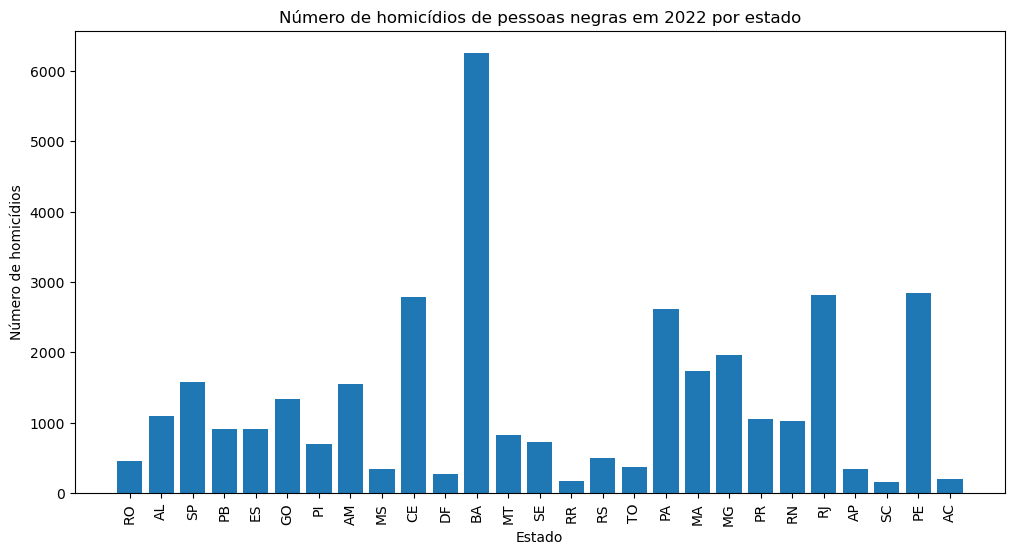

In [6]:
# Filtrar apenas o ano de 2022
df_2022 = df_homicidios_negros[df_homicidios_negros["período"] == 2022]

# Mostrar resultado
print(df_2022)

# Exemplo de visualização gráfica (barras)
plt.figure(figsize=(12,6))
plt.bar(df_2022["nome"], df_2022["valor"])
plt.xticks(rotation=90)
plt.title("Número de homicídios de pessoas negras em 2022 por estado")
plt.xlabel("Estado")
plt.ylabel("Número de homicídios")

# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("homicidios_2022.png", dpi=300, bbox_inches="tight")

# Mostrar na tela (opcional)
plt.show()


## Os 10 estados com maior população total 

   nome  pop_total
24   SP   44411238
20   MG   20539989
21   RJ   16055174
0    BA   14141626
25   PR   11444380
27   RS   10882965
13   PE    9058931
9    CE    8794957
1    PA    8120131
26   SC    7610361


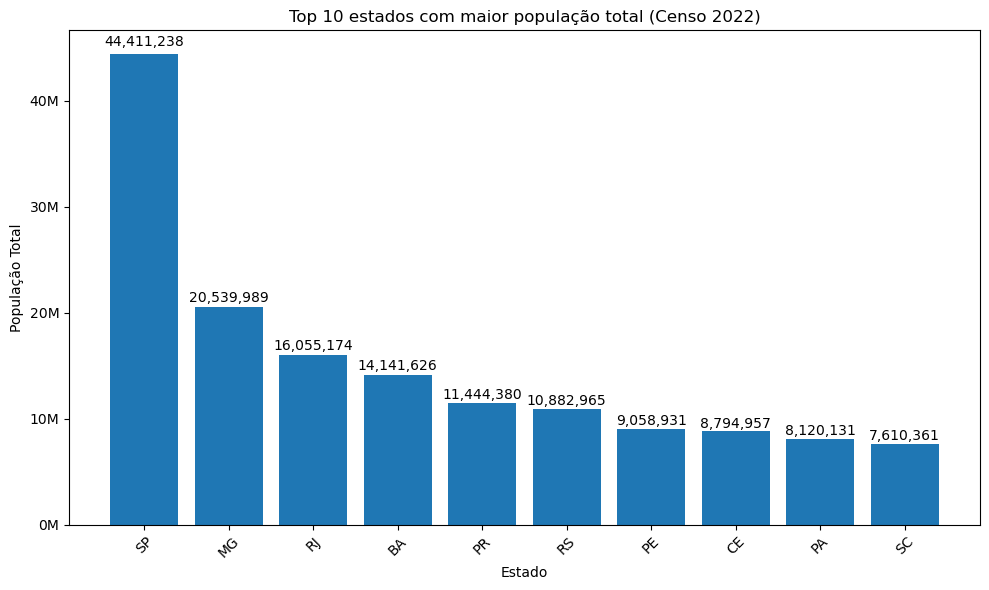

In [7]:
# Ver os valores usados no gráfico
df_estados = df_censo[df_censo["nome"] != "BR"]
top10 = df_estados.sort_values("pop_total", ascending=False).head(10)
print(top10[["nome", "pop_total"]])

top10 = top10.copy()                          # evitar warning de view
top10["pop_total"] = top10["pop_total"].astype(int)

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(top10["nome"], top10["pop_total"])
ax.set_title("Top 10 estados com maior população total (Censo 2022)")
ax.set_xlabel("Estado")
ax.set_ylabel("População Total")

# Mostrar eixo y em milhões (ex: 10M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar rótulo com separador de milhares em cada barra
for bar in bars:
    h = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.01*h, f'{h:,}', ha='center', va='bottom')


# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("populção_2022.png", dpi=300, bbox_inches="tight")

plt.show()

## Os 10 estados com maior população negra

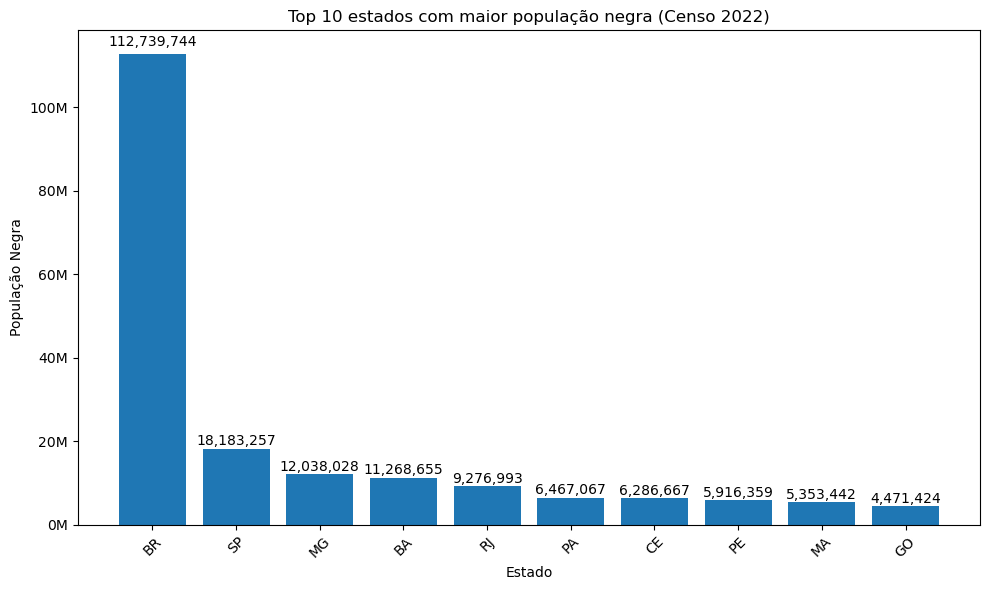

   nome  pop_negra
22   BR  112739744
24   SP   18183257
20   MG   12038028
0    BA   11268655
21   RJ    9276993
1    PA    6467067
9    CE    6286667
13   PE    5916359
2    MA    5353442
16   GO    4471424


In [8]:
# Remover linha do Brasil (se existir) e ordenar
df_estados = df_censo[df_censo["nome"] != "Brasil"]
top10_negra = df_estados.sort_values(by="pop_negra", ascending=False).head(10)

# Selecionar apenas estados e ordenar pela população negra
df_estados = df_censo[df_censo["nome"] != "Brasil"]
top10_negra = df_estados.sort_values("pop_negra", ascending=False).head(10)

# Garantir números inteiros
top10_negra = top10_negra.copy()
top10_negra["pop_negra"] = top10_negra["pop_negra"].astype(int)

# Criar gráfico
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(top10_negra["nome"], top10_negra["pop_negra"])
ax.set_title("Top 10 estados com maior população negra (Censo 2022)")
ax.set_xlabel("Estado")
ax.set_ylabel("População Negra")

# Eixo Y em milhões
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar rótulos com separador de milhares
for bar in bars:
    h = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.01*h, f'{h:,}', ha='center', va='bottom')

# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("população_negra_2022.png", dpi=300, bbox_inches="tight")

plt.show()

# Mostrar tabela no console
print(top10_negra[["nome", "pop_negra"]])

## Percentual de pessoas negras os 10 estados com mais e os 10 estados com menos

  nome  pop_total  pop_negra  perc_negra
0   BA   14141626   11268655        79.7
1   PA    8120131    6467067        79.6
2   MA    6776699    5353442        79.0
3   AP     733759     565637        77.1
4   PI    3271199    2521542        77.0
5   TO    1511460    1138654        75.3
6   AC     830018     620975        74.8
7   SE    2210004    1645464        74.4
8   AM    3941613    2905285        73.7
9   CE    8794957    6286667        71.4
   nome  pop_total  pop_negra  perc_negra
18   RN    3302729    1983709        60.0
19   DF    2817381    1672601        59.3
20   MG   20539989   12038028        58.6
21   RJ   16055174    9276993        57.8
22   BR  203080756  112739744        55.5
23   MS    2757013    1472898        53.4
24   SP   44411238   18183257        41.0
25   PR   11444380    3925818        34.3
26   SC    7610361    1772896        23.3
27   RS   10882965    2306194        21.2


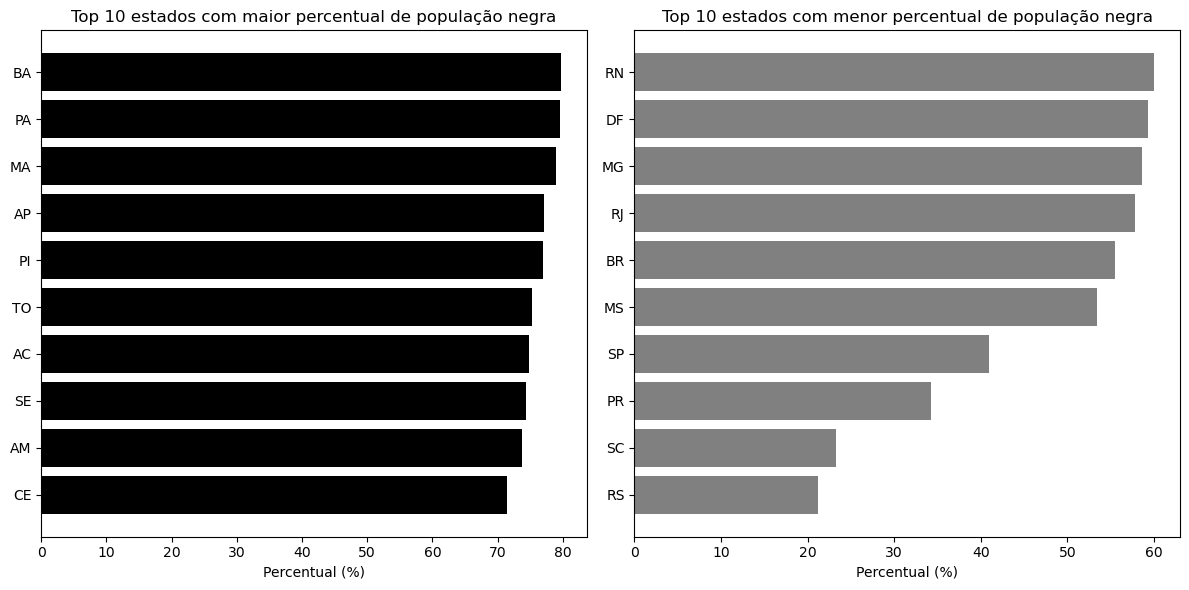

In [9]:
# Ordenar pelo percentual de pessoas negras
df_sorted = df_censo.sort_values("perc_negra", ascending=False)

# Top 10 e Bottom 10
top10 = df_sorted.head(10)
bottom10 = df_sorted.tail(10)

print(top10)
print(bottom10)

# Criar gráficos
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
plt.barh(top10["nome"], top10["perc_negra"], color="black")
plt.xlabel("Percentual (%)")
plt.title("Top 10 estados com maior percentual de população negra")
plt.gca().invert_yaxis()

# Bottom 10
plt.subplot(1, 2, 2)
plt.barh(bottom10["nome"], bottom10["perc_negra"], color="gray")
plt.xlabel("Percentual (%)")
plt.title("Top 10 estados com menor percentual de população negra")
plt.gca().invert_yaxis()

plt.tight_layout()

# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("populacao_negra.png", dpi=300, bbox_inches="tight")

plt.show()

# PIB PER CAPITA

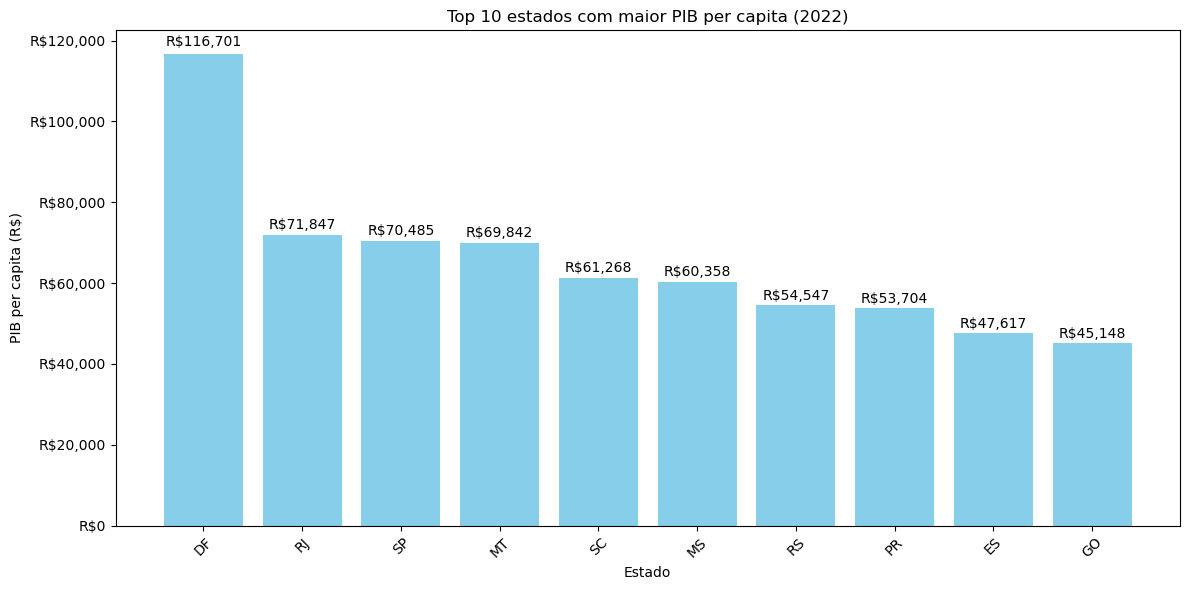

   nome  pib_per_capita
7    DF   116700.581143
1    RJ    71846.745479
0    SP    70485.155131
9    MT    69841.900658
5    SC    61268.315655
14   MS    60357.713221
4    RS    54547.083446
3    PR    53704.176198
13   ES    47616.774552
8    GO    45147.909833


In [10]:
# --- 1. Unir PIB e população ---
df = pd.merge(df_pib, df_censo, on="nome", how="inner")

# --- 2. Calcular PIB per capita ---
# PIB em milhares de reais -> multiplicar por 1000 para reais
df["pib_reais"] = df["pib_mil_reais"] * 1000
df["pib_per_capita"] = df["pib_reais"] / df["pop_total"]

# --- 3. Ordenar para top 10 PIB per capita ---
top10_pib_pc = df.sort_values("pib_per_capita", ascending=False).head(10)

# --- 4. Criar gráfico ---
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(top10_pib_pc["nome"], top10_pib_pc["pib_per_capita"], color="skyblue")
ax.set_title("Top 10 estados com maior PIB per capita (2022)")
ax.set_xlabel("Estado")
ax.set_ylabel("PIB per capita (R$)")

# Formatar eixo y com separador de milhares
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'R${x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar rótulo em cada barra
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.01*h, f'R${h:,.0f}', ha='center', va='bottom')

# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("pib_per_capita_2022.png", dpi=300, bbox_inches="tight")

plt.show()

# --- 5. Mostrar tabela no console ---
print(top10_pib_pc[["nome", "pib_per_capita"]])


In [11]:
# --- 3. Ordenar do maior para o menor (opcional) ---
df_sorted = df.sort_values("pib_per_capita", ascending=False)

# --- 4. Adicionar a coluna de posição ---
df_sorted["posicao"] = df_sorted["pib_per_capita"].rank(ascending=False, method="first")

# --- 5. Mostrar tabela completa ---
print(df_sorted[["nome", "pib_per_capita", "posicao"]])


   nome  pib_per_capita  posicao
7    DF   116700.581143      1.0
1    RJ    71846.745479      2.0
0    SP    70485.155131      3.0
9    MT    69841.900658      4.0
5    SC    61268.315655      5.0
14   MS    60357.713221      6.0
4    RS    54547.083446      7.0
3    PR    53704.176198      8.0
13   ES    47616.774552      9.0
8    GO    45147.909833     10.0
2    MG    44144.668237     11.0
21   RO    42243.339852     12.0
22   TO    38511.770077     13.0
15   AM    36822.488661     14.0
26   RR    33131.408953     15.0
25   AP    32182.228770     16.0
11   PA    29081.057929     17.0
24   AC    28524.682597     18.0
6    BA    28472.468442     19.0
17   RN    28406.508678     20.0
10   PE    27136.535205     21.0
23   SE    25960.134009     22.0
19   AL    24320.239615     23.0
12   CE    24286.758878     24.0
20   PI    22265.536276     25.0
18   PB    21660.573524     26.0
16   MA    20627.889773     27.0


# TAXA DE HOMOCIDIOS NEGROS(por 100 mil)

In [12]:
# Pegar o último ano disponível
ultimo_ano = df_homicidios_negros["período"].max()
df_homicidios_ultimo = df_homicidios_negros[df_homicidios_negros["período"] == ultimo_ano]

# Juntar homicídios com população negra
df_merged = df_homicidios_ultimo.merge(df_censo, on="nome")

# Calcular a taxa por 100 mil
df_merged["taxa_homicidios_negros"] = (df_merged["valor"] / df_merged["pop_negra"]) * 100000

# Selecionar colunas importantes
resultado = df_merged[["cod", "nome", "período", "valor", "pop_negra", "taxa_homicidios_negros"]]

print(resultado)

    cod nome  período  valor  pop_negra  taxa_homicidios_negros
0    21   MA     2023   1691    5353442               31.587155
1    27   AL     2023   1120    2186574               51.221683
2    12   AC     2023    184     620975               29.630822
3    43   RS     2023    506    2306194               21.940912
4    17   TO     2023    372    1138654               32.670153
5    35   SP     2023   1442   18183257                7.930372
6    50   MS     2023    311    1472898               21.114836
7    25   PB     2023    903    2524452               35.770139
8    14   RR     2023    128     413689               30.941118
9    51   MT     2023    888    2409480               36.854425
10   13   AM     2023   1381    2905285               47.534063
11   33   RJ     2023   3101    9276993               33.426780
12   11   RO     2023    423    1073501               39.403783
13   31   MG     2023   2028   12038028               16.846613
14   26   PE     2023   2813    5916359 

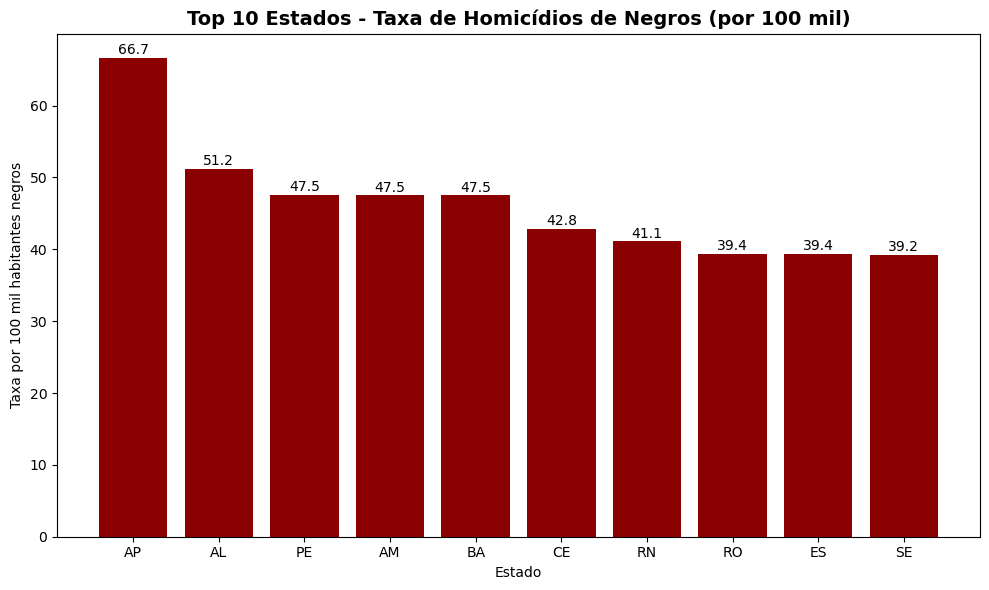

In [13]:
# Ordenar pelos maiores valores e pegar os 10 primeiros
top10 = resultado.sort_values(by="taxa_homicidios_negros", ascending=False).head(10)

# Criar o gráfico
plt.figure(figsize=(10,6))
plt.bar(top10["nome"], top10["taxa_homicidios_negros"], color="darkred")

# Títulos e rótulos
plt.title("Top 10 Estados - Taxa de Homicídios de Negros (por 100 mil)", fontsize=14, fontweight="bold")
plt.xlabel("Estado")
plt.ylabel("Taxa por 100 mil habitantes negros")

# Mostrar os valores em cima das barras
for i, v in enumerate(top10["taxa_homicidios_negros"]):
    plt.text(i, v + 0.5, f"{v:.1f}", ha="center", fontsize=10)

plt.tight_layout()
# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("taxa_homicidios_2022.png", dpi=300, bbox_inches="tight")
plt.show()

## Quanto maior o pib menor a taxa?

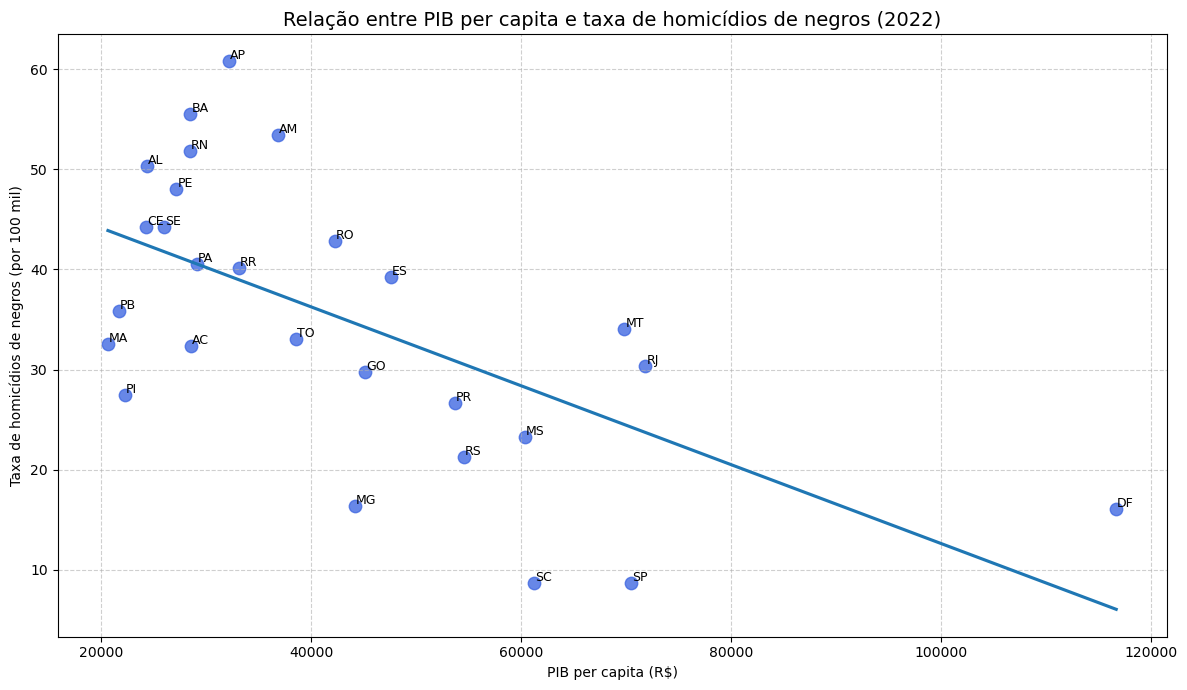

In [15]:
# Scatter plot: PIB per capita vs Taxa de homicídios negros
plt.figure(figsize=(12,7))
sns.regplot(
    data=df_resultado,
    x="pib_per_capita",
    y="taxa_homicidios_negros",
    scatter=True,
    ci=None,
    scatter_kws={"s":80, "color":"royalblue"}
)

# Adicionar os nomes dos estados em cada bolinha
for i, row in df_resultado.iterrows():
    plt.text(
        row["pib_per_capita"] + 100,   # desloca um pouquinho no eixo X
        row["taxa_homicidios_negros"] + 0.2,  # desloca um pouquinho no eixo Y
        row["nome"],
        fontsize=9,
        color="black"
    )

plt.title("Relação entre PIB per capita e taxa de homicídios de negros (2022)", fontsize=14)
plt.xlabel("PIB per capita (R$)")
plt.ylabel("Taxa de homicídios de negros (por 100 mil)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar como PNG (300 dpi para boa qualidade)
plt.savefig("pib_x_taxadehomicidios_rotulado.png", dpi=300, bbox_inches="tight")
plt.show()

## Tabela por PIB

In [34]:
import pandas as pd

# --- Dados do censo ---
dados_censo = {
    "nome": ["BA","PA","MA","AP","PI","TO","AC","SE","AM","CE","AL","RO","MT","PE",
             "RR","PB","GO","ES","RN","DF","MG","RJ","BR","MS","SP","PR","SC","RS"],
    "pop_total":[14141626,8120131,6776699,733759,3271199,1511460,830018,2210004,
                 3941613,8794957,3127683,1581196,3658649,9058931,636707,3974687,
                 7056495,3833712,3302729,2817381,20539989,16055174,203080756,
                 2757013,44411238,11444380,7610361,10882965],
    "pop_negra":[11268655,6467067,5353442,565637,2521542,1138654,620975,1645464,
                 2905285,6286667,2186574,1073501,2409480,5916359,413689,2524452,
                 4471424,2338483,1983709,1672601,12038028,9276993,112739744,
                 1472898,18183257,3925818,1772896,2306194]
}
df_censo = pd.DataFrame(dados_censo)
df_censo = df_censo[df_censo["nome"] != "BR"]

# --- PIB ---
dados_pib = {
    "nome": ["SP","RJ","MG","PR","RS","SC","BA","DF","GO","MT","PE","PA","CE",
             "ES","MS","AM","MA","RN","PB","AL","PI","RO","TO","SE","AC","AP","RR"],
    "pib_mil_reais":[3130333000,1153512000,906731000,614611000,593634000,466274000,
                     402647000,328790000,318586000,255527000,245828000,236142000,
                     213601000,182549000,166407000,145140000,139789000,93819000,
                     86094000,76066000,72835000,66795000,58209000,57372000,23676000,
                     23614000,21095000]
}
df_pib = pd.DataFrame(dados_pib)

# --- Homicídios ---
df_homicidios = pd.read_csv("homicidios-negros.csv", sep=";")
df_homicidios_2022 = df_homicidios[df_homicidios["período"] == 2022]

# --- Unir tudo ---
df = pd.merge(df_pib, df_censo, on="nome", how="inner")
df = pd.merge(df, df_homicidios_2022, on="nome", how="inner")

# --- Cálculos ---
df["pib_reais"] = df["pib_mil_reais"] * 1000
df["pib_per_capita"] = df["pib_reais"] / df["pop_total"]
df["taxa_homicidios_negros"] = (df["valor"] / df["pop_negra"]) * 100000

# --- Tabela ordenada pelo PIB per capita ---
tabela_pib = df.sort_values(by="pib_per_capita", ascending=False)[
    ["nome", "pib_per_capita", "taxa_homicidios_negros"]
].reset_index(drop=True)
tabela_pib.columns = ["Estado", "PIB per capita (R$)", "Taxa de homicídios (100 mil negros)"]

# --- Dividir em 2 tabelas ---
metade = len(tabela_pib) // 2
tabela_esq = tabela_pib.iloc[:metade]
tabela_dir = tabela_pib.iloc[metade:]

def estilizar(df, titulo):
    return (
        df.style
        .format({
            "PIB per capita (R$)": "R$ {:,.2f}".format,
            "Taxa de homicídios (100 mil negros)": "{:,.2f}".format
        })
        .set_table_styles([
            {"selector": "thead th", "props": "background-color: white; color: black; font-weight: bold; text-align: center; font-size: 12pt;"},
            {"selector": "tbody td", "props": "background-color: white; color: black; text-align: center; font-size: 11pt;"}
        ])
        .set_properties(**{"border": "1px solid #ccc", "padding": "9px"})
        .set_caption(titulo)
        .to_html()
    )

# --- Montar lado a lado ---
html_final = f"""
<div style="display: flex; gap: 40px;">
    <div>{estilizar(tabela_esq, "Tabela - Estados ordenados do maior para o menor PIB per capita (2022)")}</div>
    <div>{estilizar(tabela_dir, "Tabela - Estados ordenados do maior para o menor PIB per capita (2022)")}</div>
</div>
"""

# Mostrar no Jupyter
display(HTML(html_final))


,Estado,PIB per capita (R$),Taxa de homicídios (100 mil negros)
0,DF,"R$ 116,700.58",16.08
1,RJ,"R$ 71,846.75",30.37
2,SP,"R$ 70,485.16",8.66
3,MT,"R$ 69,841.90",34.07
4,SC,"R$ 61,268.32",8.63
5,MS,"R$ 60,357.71",23.29
6,RS,"R$ 54,547.08",21.29
7,PR,"R$ 53,704.18",26.70
8,ES,"R$ 47,616.77",39.21
9,GO,"R$ 45,147.91",29.74


## Tabela por Homicidios

In [38]:
# --- Mesmos dados do censo, PIB e homicídios ---
# (Reaproveitar df criado na célula anterior)

# --- Tabela ordenada pela taxa de homicídios ---
tabela_homicidios = df.sort_values(by="taxa_homicidios_negros", ascending=False)[
    ["nome", "pib_per_capita", "taxa_homicidios_negros"]
].reset_index(drop=True)
tabela_homicidios.columns = ["Estado", "PIB per capita (R$)", "Taxa de homicídios (100 mil negros)"]

# --- Estilo ---
# --- Dividir em 2 tabelas ---
metade = len(tabela_homicidios) // 2
tabela_esq = tabela_homicidios.iloc[:metade]
tabela_dir = tabela_homicidios.iloc[metade:]

def estilizar(df, titulo):
    return (
        df.style
        .format({
            "PIB per capita (R$)": "R$ {:,.2f}".format,
            "Taxa de homicídios (100 mil negros)": "{:,.2f}".format
        })
        .set_table_styles([
            {"selector": "thead th", "props": "background-color: white; color: black; font-weight: bold; text-align: center; font-size: 12pt;"},
            {"selector": "tbody td", "props": "background-color: white; color: black; text-align: center; font-size: 11pt;"}
        ])
        .set_properties(**{"border": "1px solid #ccc", "padding": "8px"})
        .set_caption(titulo)
        .to_html()
    )

# --- Montar lado a lado ---
html_final = f"""
<div style="display: flex; gap: 40px;">
    <div>{estilizar(tabela_esq, "Tabela - Estados ordenados do maior para o menor homicídios (2022)")}</div>
    <div>{estilizar(tabela_dir, "Tabela - Estados ordenados do maior para o menor homicídios (2022)")}</div>
</div>
"""

# Mostrar no Jupyter
display(HTML(html_final))


,Estado,PIB per capita (R$),Taxa de homicídios (100 mil negros)
0,AP,"R$ 32,182.23",60.82
1,BA,"R$ 28,472.47",55.54
2,AM,"R$ 36,822.49",53.45
3,RN,"R$ 28,406.51",51.87
4,AL,"R$ 24,320.24",50.35
5,PE,"R$ 27,136.54",48.04
6,SE,"R$ 25,960.13",44.24
7,CE,"R$ 24,286.76",44.24
8,RO,"R$ 42,243.34",42.85
9,PA,"R$ 29,081.06",40.54


In [42]:
import pandas as pd
from IPython.display import display, HTML

# --- Dados do censo ---
dados_censo = {
    "nome": ["BA","PA","MA","AP","PI","TO","AC","SE","AM","CE","AL","RO","MT","PE",
             "RR","PB","GO","ES","RN","DF","MG","RJ","BR","MS","SP","PR","SC","RS"],
    "pop_total":[14141626,8120131,6776699,733759,3271199,1511460,830018,2210004,
                 3941613,8794957,3127683,1581196,3658649,9058931,636707,3974687,
                 7056495,3833712,3302729,2817381,20539989,16055174,203080756,
                 2757013,44411238,11444380,7610361,10882965],
    "pop_negra":[11268655,6467067,5353442,565637,2521542,1138654,620975,1645464,
                 2905285,6286667,2186574,1073501,2409480,5916359,413689,2524452,
                 4471424,2338483,1983709,1672601,12038028,9276993,112739744,
                 1472898,18183257,3925818,1772896,2306194]
}
df_censo = pd.DataFrame(dados_censo)
df_censo = df_censo[df_censo["nome"] != "BR"]

# --- PIB ---
dados_pib = {
    "nome": ["SP","RJ","MG","PR","RS","SC","BA","DF","GO","MT","PE","PA","CE",
             "ES","MS","AM","MA","RN","PB","AL","PI","RO","TO","SE","AC","AP","RR"],
    "pib_mil_reais":[3130333000,1153512000,906731000,614611000,593634000,466274000,
                     402647000,328790000,318586000,255527000,245828000,236142000,
                     213601000,182549000,166407000,145140000,139789000,93819000,
                     86094000,76066000,72835000,66795000,58209000,57372000,23676000,
                     23614000,21095000]
}
df_pib = pd.DataFrame(dados_pib)

# --- Homicídios ---
df_homicidios = pd.read_csv("homicidios-negros.csv", sep=";")
df_homicidios_2022 = df_homicidios[df_homicidios["período"] == 2022]

# --- Unir tudo ---
df = pd.merge(df_pib, df_censo, on="nome", how="inner")
df = pd.merge(df, df_homicidios_2022, on="nome", how="inner")

# --- Cálculos ---
df["pib_reais"] = df["pib_mil_reais"] * 1000
df["pib_per_capita"] = df["pib_reais"] / df["pop_total"]
df["taxa_homicidios_negros"] = (df["valor"] / df["pop_negra"]) * 100000

# --- Tabelas ---
tabela_pib = df.sort_values(by="pib_per_capita", ascending=False)[
    ["nome", "pib_per_capita", "taxa_homicidios_negros"]
].reset_index(drop=True)
tabela_pib.columns = ["Estado", "PIB per capita (R$)", "Taxa de homicídios (100 mil negros)"]

tabela_homicidios = df.sort_values(by="taxa_homicidios_negros", ascending=False)[
    ["nome", "pib_per_capita", "taxa_homicidios_negros"]
].reset_index(drop=True)
tabela_homicidios.columns = ["Estado", "PIB per capita (R$)", "Taxa de homicídios (100 mil negros)"]

# --- Estilo Clean em HTML ---
def tabela_html(df, titulo):
    return df.style \
        .format({"PIB per capita (R$)": "R$ {:,.2f}".format,
                 "Taxa de homicídios (100 mil negros)": "{:,.2f}".format}) \
        .set_table_styles([
            {"selector": "thead th", "props": "background-color: white; color: black; font-weight: bold; text-align: center; font-size: 12pt;"},
            {"selector": "tbody td", "props": "background-color: white; color: black; text-align: center; font-size: 11pt;"}
        ]) \
        .set_properties(**{"border": "1px solid #ccc", "padding": "8px"}) \
        .set_caption(titulo) \
        .to_html()  # <-- substitua .render() por .to_html()

# --- Mostrar lado a lado ---
html_code = f"""
<div style="display: flex; gap: 50px;">
    <div>{tabela_html(tabela_pib, "Tabela - Estados por PIB per capita (2022)")}</div>
    <div>{tabela_html(tabela_homicidios, "Tabela - Estados ordenados do maior para o menor homicídios (2022)")}</div>
</div>
"""


# Mostrar no Jupyter
display(HTML(html_code))


,Estado,PIB per capita (R$),Taxa de homicídios (100 mil negros)
0,DF,"R$ 116,700.58",16.08
1,RJ,"R$ 71,846.75",30.37
2,SP,"R$ 70,485.16",8.66
3,MT,"R$ 69,841.90",34.07
4,SC,"R$ 61,268.32",8.63
5,MS,"R$ 60,357.71",23.29
6,RS,"R$ 54,547.08",21.29
7,PR,"R$ 53,704.18",26.70
8,ES,"R$ 47,616.77",39.21
9,GO,"R$ 45,147.91",29.74


In [20]:
corr_pearson = df["pib_per_capita"].corr(df["taxa_homicidios_negros"], method="pearson")
corr_spearman = df["pib_per_capita"].corr(df["taxa_homicidios_negros"], method="spearman")

print("Correlação de Pearson:", corr_pearson)
print("Correlação de Spearman:", corr_spearman)

Correlação de Pearson: -0.6175890936752347
Correlação de Spearman: -0.5873015873015872


In [38]:
# Matriz de correlação de Pearson
matriz_pearson = df.corr(method="pearson")
print("Matriz de correlação de Pearson:")
print(matriz_pearson)

ValueError: could not convert string to float: 'SP'

In [39]:
df.head()

,nome,pib_mil_reais,pop_total,pop_negra,cod,período,valor,pib_reais,pib_per_capita,taxa_homicidios_negros
0,SP,3130333000,44411238,18183257,35,2022,1574,3130333000000,70485.155131,8.656315
1,RJ,1153512000,16055174,9276993,33,2022,2817,1153512000000,71846.745479,30.365443
2,MG,906731000,20539989,12038028,31,2022,1967,906731000000,44144.668237,16.339886
3,PR,614611000,11444380,3925818,41,2022,1048,614611000000,53704.176198,26.695073
4,RS,593634000,10882965,2306194,43,2022,491,593634000000,54547.083446,21.290490
